In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Step 1: Upload Dataset
print("\U0001F4C2 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Check for null values
print("\nMissing values in each column:")
null_values = df.isnull().sum()
print(null_values)

📂 Please upload your dataset...


Saving Liver Patient Dataset (LPD)_train.csv to Liver Patient Dataset (LPD)_train.csv

Missing values in each column:
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Step 1: Upload Dataset
print("\U0001F4C2 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Check for null values
print("\nMissing values in each column:")
null_values = df.isnull().sum()
print(null_values)

📂 Please upload your dataset...


Saving holidays.csv to holidays (2).csv

Missing values in each column:
Age of the patient                      0
Gender                                  0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


**Filling Missing Values**

In [ ]:
import pandas as pd

# Mount Google Drive (if loading from Drive)
from google.colab import files

# Upload the dataset manually in Colab
uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Fill missing values for numerical columns using median
numerical_cols = df.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Round numerical values to 2 decimal places
df[numerical_cols] = df[numerical_cols].round(2)

# Fill missing values for categorical columns using mode
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Convert Gender to numerical format (Male -> 1, Female -> 2)
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 2})

# Save cleaned dataset
cleaned_file = "Liver_Patient_Cleaned.csv"
df.to_csv(cleaned_file, index=False, encoding="ISO-8859-1")

# Provide a download link
from google.colab import files
files.download(cleaned_file)


Saving Liver Patient Dataset (LPD)_train - Copy.csv to Liver Patient Dataset (LPD)_train - Copy (1).csv


<ipython-input-6-4a2281d92aee>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-4a2281d92aee>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Correlation matrix**

Saving Liver_Patient_Cleaned.csv to Liver_Patient_Cleaned (1).csv
                                      Age of the patient    Gender  \
Age of the patient                              1.000000 -0.032164   
Gender                                         -0.032164  1.000000   
Total Bilirubin                                -0.002034 -0.010954   
Direct Bilirubin                               -0.001897 -0.010007   
Alkphos Alkaline Phosphotase                   -0.000907 -0.005610   
Sgpt Alamine Aminotransferase                   0.000685 -0.003031   
Sgot Aspartate Aminotransferase                 0.005603  0.004249   
Total Protiens                                 -0.007827 -0.005211   
ALB Albumin                                    -0.015027 -0.003943   
A/G Ratio Albumin and Globulin Ratio           -0.017877 -0.000532   
Result                                         -0.004761  0.003190   

                                      Total Bilirubin  Direct Bilirubin  \
Age of the patient

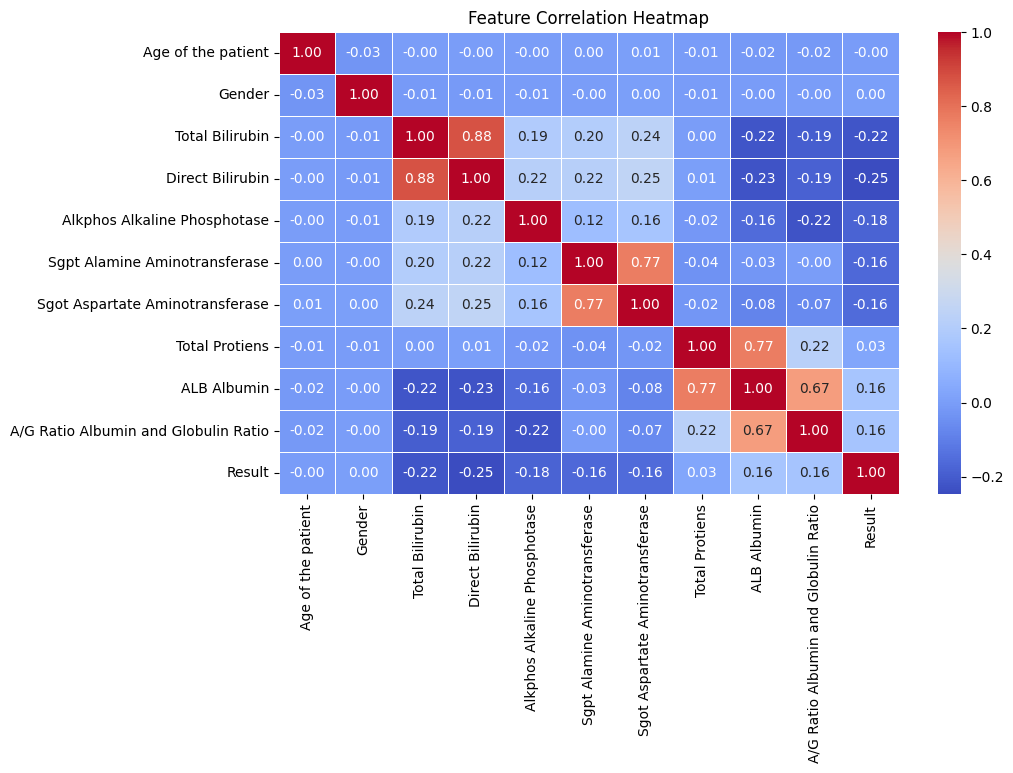

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name, encoding="ISO-8859-1")


# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation values
print(correlation_matrix)

# Plot heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**Class imbalance Check**

Saving Liver_Patient_Cleaned.csv to Liver_Patient_Cleaned (2).csv
Class Distribution:
Result
1    21917
2     8774
Name: count, dtype: int64


<ipython-input-10-077c476facbf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


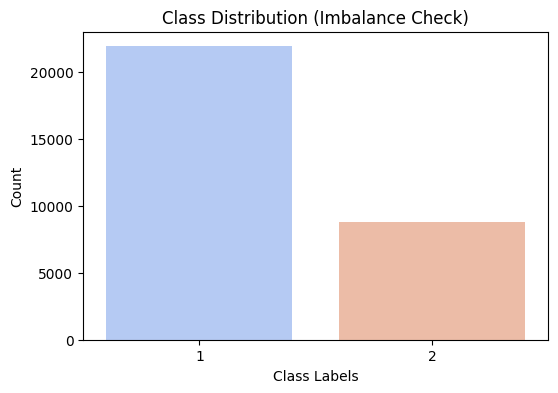

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Define the target column
target_column = "Result"

# Count occurrences of each class
class_counts = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance Check)")
plt.show()


**Smote+Tomek**

In [ ]:
import pandas as pd
from imblearn.combine import SMOTETomek
from google.colab import files
import io

# Step 1: Upload dataset manually
print("📂 Please upload your dataset...")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Step 2: Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Step 3: Define features (X) and target (y)
target_column = "Result"  # Change this if your target column has a different name
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 4: Apply SMOTE + Tomek Links (Oversampling + Undersampling)
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Step 5: Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced[target_column] = y_resampled  # Add target column back

# Step 6: Save and download the balanced dataset
balanced_file = "SMOTE + Tomek Links (Oversampling + Undersampling).csv"
df_balanced.to_csv(balanced_file, index=False, encoding="ISO-8859-1")

# Step 7: Provide a download link
files.download(balanced_file)

print("✅ Dataset successfully balanced and downloaded as:", balanced_file)


📂 Please upload your dataset...


KeyboardInterrupt: 

**Class imbalance ReCheck**

Saving Processed_Dataset_Winsorized.csv to Processed_Dataset_Winsorized (1).csv
Class Distribution:
Result
0.0    21639
1.0    21639
Name: count, dtype: int64


<ipython-input-11-077c476facbf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


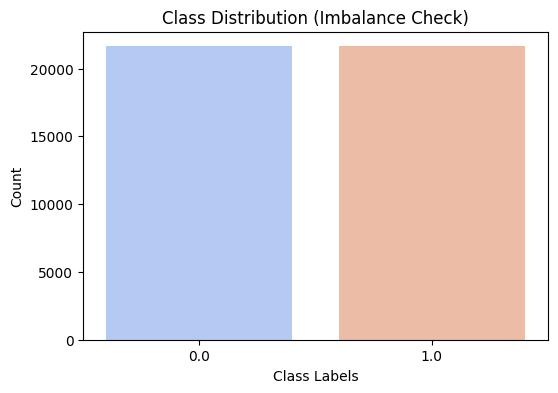

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Define the target column
target_column = "Result"

# Count occurrences of each class
class_counts = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance Check)")
plt.show()


**Detect & Handle Outliers Using Z-Score**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from google.colab import files
import io

# Step 1: Upload dataset manually
print("📂 Please upload your dataset...")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Step 2: Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Step 3: Detect & Handle Outliers Using Z-Score
def remove_outliers_zscore(dataframe, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe.select_dtypes(include=[np.number])))  # Compute Z-scores
    df_no_outliers = dataframe[(z_scores < threshold).all(axis=1)]  # Remove rows where any column has a Z-score > threshold
    return df_no_outliers

# Apply outlier removal (only to numeric columns)
df_cleaned = remove_outliers_zscore(df)

# Step 4: Save and download the cleaned dataset
cleaned_file = "holidays outliers.csv"
df_cleaned.to_csv(cleaned_file, index=False, encoding="ISO-8859-1")

# Step 5: Provide a download link
files.download(cleaned_file)

print("✅ Outliers handled using Z-score! Cleaned dataset saved as:", cleaned_file)


📂 Please upload your dataset...


Saving Cleaned_Datasetoutliers.csv to Cleaned_Datasetoutliers (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Outliers handled using Z-score! Cleaned dataset saved as: holidays outliers.csv


Saving Processed_Dataset_KNN.csv to Processed_Dataset_KNN (2).csv
Class Distribution:
Result
0.0    21639
1.0    21639
Name: count, dtype: int64


<ipython-input-10-077c476facbf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


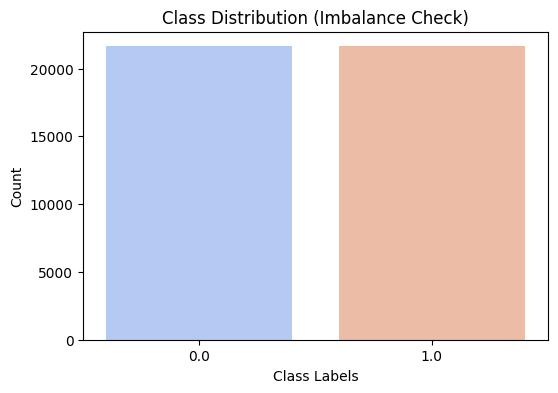

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get the file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="ISO-8859-1")

# Define the target column
target_column = "Result"

# Count occurrences of each class
class_counts = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance Check)")
plt.show()


**Encoding**

In [ ]:
import pandas as pd
from google.colab import files
import io

# Step 1: Upload dataset manually
print("📂 Please upload your dataset...")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Step 2: Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Step 3: Label Encoding
# Encoding Gender: Male -> 1, Female -> 2
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 2})

# Encoding Result: 1 -> 0, 2 -> 1
df["Result"] = df["Result"].replace({1: 0, 2: 1})

# Step 4: Save and download the encoded dataset
encoded_file = "Encoded_Dataset.csv"
df.to_csv(encoded_file, index=False, encoding="ISO-8859-1")

# Step 5: Provide a download link
files.download(encoded_file)

print("✅ Encoding complete! Encoded dataset saved as:", encoded_file)


📂 Please upload your dataset...


Saving Cleaned_Dataset.csv to Cleaned_Dataset (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Encoding complete! Encoded dataset saved as: Encoded_Dataset.csv


**For Final Dataset**

📂 Please upload your dataset...


Saving Processed_Dataset_KNN.csv to Processed_Dataset_KNN (1).csv


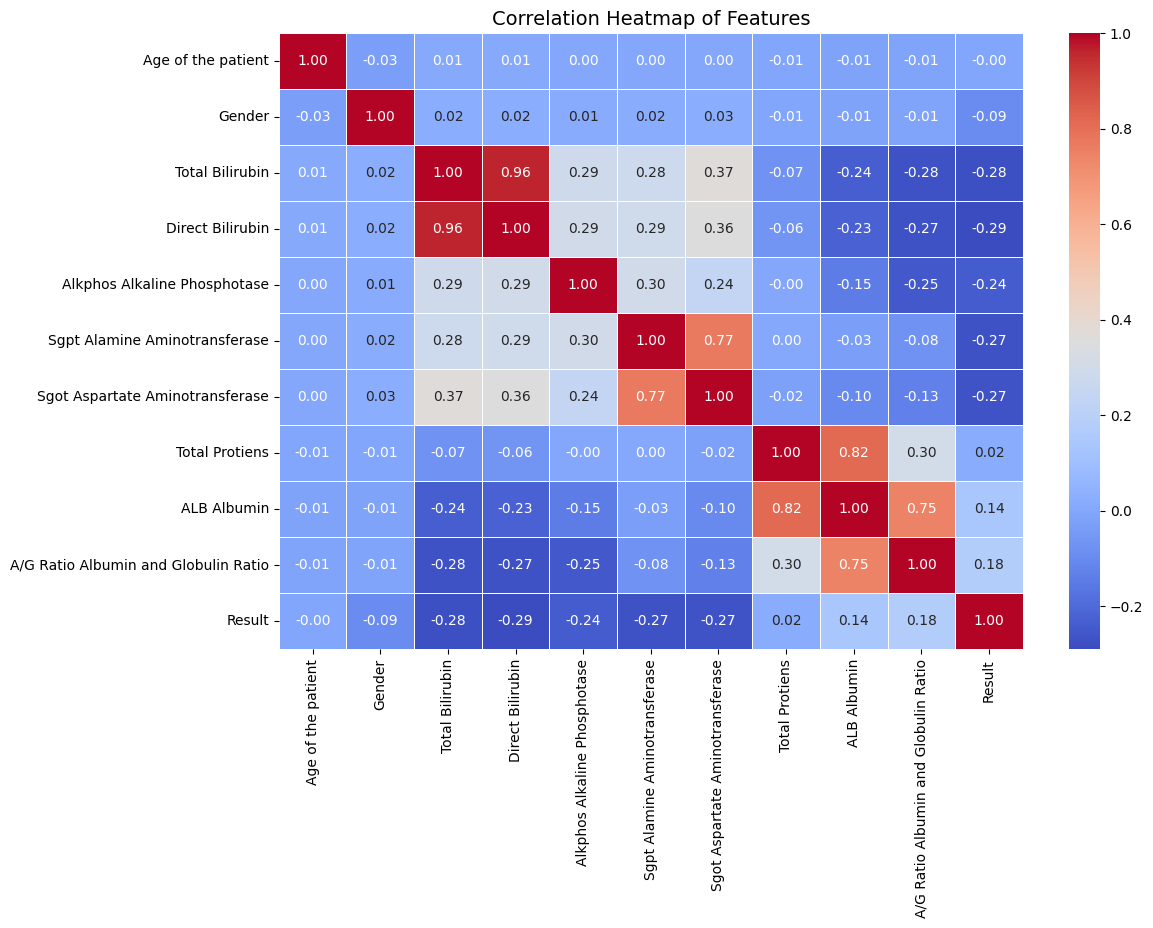

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Step 2: Compute Correlation Matrix
correlation_matrix = df.corr()

# Step 3: Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


**Testing Outliers**

In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Exclude Categorical Variables (Gender, Result)
categorical_features = ["Gender", "Result"]
numeric_features = [col for col in df.columns if col not in categorical_features]

# Step 3: Apply Log Transformation to Highly Skewed Features
log_transform_features = ["Total Bilirubin", "Direct Bilirubin", "Alkaline Phosphatase", "SGPT", "SGOT"]

for feature in log_transform_features:
    if feature in numeric_features:
        df[feature] = np.log1p(df[feature])  # log1p to avoid log(0) issue

# Step 4: Detect Outliers using Z-Score & IQR
z_threshold = 3  # Standard threshold for Z-score method
iqr_threshold = 1.5  # Standard threshold for IQR method

outlier_counts = {}

for column in numeric_features:
    z_scores = np.abs(zscore(df[column]))
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    iqr_lower = df[column].quantile(0.25) - (iqr_threshold * iqr)
    iqr_upper = df[column].quantile(0.75) + (iqr_threshold * iqr)

    outlier_counts[column] = {
        "Outliers (Z-Score)": (z_scores > z_threshold).sum(),
        "Outliers (IQR)": ((df[column] < iqr_lower) | (df[column] > iqr_upper)).sum()
    }

# Convert to DataFrame and Display
outlier_df = pd.DataFrame(outlier_counts).T
print("\n📊 Outlier Report:")
print(outlier_df)

# Step 5: Replace Outliers using KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[numeric_features] = knn_imputer.fit_transform(df[numeric_features])

# Step 6: Save the Processed Dataset
processed_file_name = "Processed_Dataset.csv"
df_imputed.to_csv(processed_file_name, index=False)
print("\n✅ Processed dataset saved successfully!")

# Step 7: Download Processed File
files.download(processed_file_name)


📂 Please upload your dataset...


Saving Processed_Dataset_KNN.csv to Processed_Dataset_KNN (4).csv

📊 Outlier Report:
                                      Outliers (Z-Score)  Outliers (IQR)
Age of the patient                                     0              63
Total Bilirubin                                     1078            3387
Direct Bilirubin                                    1072            4062
Alkphos Alkaline Phosphotase                        1162            3782
Sgpt Alamine Aminotransferase                        979            4253
Sgot Aspartate Aminotransferase                     1152            4458
Total Protiens                                         0             981
ALB Albumin                                            0              65
A/G Ratio Albumin and Globulin Ratio                 263            1711

✅ Processed dataset saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload and Load Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Define Columns for Outlier Detection (Exclude Categorical)
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Exclude categorical variables
outlier_columns = [col for col in numerical_columns if col not in ["Gender", "Result"]]

# Step 3: Detect Outliers Using Z-Score
z_threshold = 3  # Standard threshold
z_scores = np.abs(zscore(df[outlier_columns]))
outliers_z = (z_scores > z_threshold).sum()

# Step 4: Detect Outliers Using IQR
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).sum()

# Step 5: Calculate Outlier Percentage
total_rows = len(df)
total_outliers = outliers_z.sum()
outlier_percentage = (total_outliers / total_rows) * 100

# Step 6: Print Outlier Analysis
print("\n🔍 Outlier Analysis:")
print(f"📌 Total Rows in Dataset: {total_rows}")
print(f"📌 Total Outliers Detected (Z-Score): {total_outliers}")
print(f"📌 Outlier Percentage: {outlier_percentage:.2f}%")

# Step 7: Decide Outlier Handling Strategy
if outlier_percentage < 5:
    print("✅ Outlier percentage is low (<5%). Keeping them for model training.")
elif outlier_percentage < 15:
    print("🔄 Moderate outliers detected (5-15%). Applying KNN Imputation.")
elif outlier_percentage > 15:
    print("⚠️ High outlier percentage (>15%). Applying Log Transformation and KNN Imputation.")

# Step 8: Apply KNN Imputation (Replacing Outliers Instead of Removal)
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[outlier_columns] = imputer.fit_transform(df[outlier_columns])

# Step 9: Apply Log Transformation to Skewed Features
log_transform_columns = ["Total Bilirubin", "Direct Bilirubin", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Alkphos Alkaline Phosphotase"]
for col in log_transform_columns:
    if col in df.columns:
        df_imputed[col] = np.log1p(df_imputed[col])

# Step 10: Save Processed Dataset
df_imputed.to_csv("Processed_Dataset.csv", index=False)
print("\n✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.")


📂 Please upload your dataset...


Saving holidays.csv to holidays (6).csv

🔍 Outlier Analysis:
📌 Total Rows in Dataset: 43278
📌 Total Outliers Detected (Z-Score): 5706
📌 Outlier Percentage: 13.18%
🔄 Moderate outliers detected (5-15%). Applying KNN Imputation.

✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.


In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload and Load Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Define Columns for Outlier Detection (Exclude Categorical)
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Exclude categorical variables
outlier_columns = [col for col in numerical_columns if col not in ["Gender", "Result"]]

# Step 3: Detect Outliers Using Z-Score
z_threshold = 3  # Standard threshold
z_scores = np.abs(zscore(df[outlier_columns]))
outliers_z = (z_scores > z_threshold).sum()

# Step 4: Detect Outliers Using IQR
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).sum()

# Step 5: Calculate Outlier Percentage
total_rows = len(df)
total_outliers = outliers_z.sum()
outlier_percentage = (total_outliers / total_rows) * 100

# Step 6: Print Outlier Analysis
print("\n🔍 Outlier Analysis:")
print(f"📌 Total Rows in Dataset: {total_rows}")
print(f"📌 Total Outliers Detected (Z-Score): {total_outliers}")
print(f"📌 Outlier Percentage: {outlier_percentage:.2f}%")

# Step 7: Decide Outlier Handling Strategy
if outlier_percentage < 5:
    print("✅ Outlier percentage is low (<5%). Keeping them for model training.")
elif outlier_percentage < 15:
    print("🔄 Moderate outliers detected (5-15%). Applying KNN Imputation.")
elif outlier_percentage > 15:
    print("⚠️ High outlier percentage (>15%). Applying Log Transformation and KNN Imputation.")

# Step 8: Apply KNN Imputation (Replacing Outliers Instead of Removal)
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[outlier_columns] = imputer.fit_transform(df[outlier_columns])

# Step 9: Apply Log Transformation to Skewed Features
log_transform_columns = ["Total Bilirubin", "Direct Bilirubin", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Alkphos Alkaline Phosphotase"]
for col in log_transform_columns:
    if col in df.columns:
        df_imputed[col] = np.log1p(df_imputed[col])

# Step 10: Save Processed Dataset
df_imputed.to_csv("Processed_Dataset.csv", index=False)
print("\n✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.")


📂 Please upload your dataset...


Saving Processed_Dataset_KNN.csv to Processed_Dataset_KNN (5).csv

🔍 Outlier Analysis:
📌 Total Rows in Dataset: 43278
📌 Total Outliers Detected (Z-Score): 5706
📌 Outlier Percentage: 13.18%
🔄 Moderate outliers detected (5-15%). Applying KNN Imputation.

✅ Processed dataset saved as 'Processed_Dataset.csv'. You can now download it.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
# Step 1: Upload and Load Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define features and target
X = df.drop(columns=["Result"])  # Exclude target variable
y = df["Result"]  # Target variable

# Step 1: Train-Test Split (Ensuring Feature Scaling & Selection are only on training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Define Cross-Validation Strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Create a Pipeline to Prevent Data Leakage
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=5)),  # Feature Selection
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Model Training
])

# Step 4: Perform Cross-Validation on Training Data
cv_scores = []
for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    pipeline.fit(X_train_fold, y_train_fold)  # Train only on training fold
    y_pred = pipeline.predict(X_val_fold)  # Predict on validation fold

    accuracy = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(accuracy)

# Step 5: Train on Full Training Data and Evaluate on Test Data
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 6: Display Results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy (Ensuring No Data Leakage): {test_accuracy:.4f}")


📂 Please upload your dataset...


Saving holidays.csv to holidays (7).csv
Cross-Validation Accuracy Scores: [0.995956678700361, 0.9984115523465704, 0.9961005199306759, 0.9963893703061814, 0.9959560947429231]
Mean Cross-Validation Accuracy: 0.9966
Test Accuracy (Ensuring No Data Leakage): 0.9954


📂 Please upload your dataset...


Saving holidays.csv to holidays.csv

📊 **Outlier Handling Report:**
🔹 Total Rows: 43278
🔹 Outliers Detected: 18859
🔹 Outlier Percentage: 43.58%

✅ Outliers Removed. New dataset has 24419 rows (Reduced from 43278).
✅ Winsorization Applied: Extreme values replaced with nearest valid boundary.
✅ Log Transformation Applied: Outliers impact reduced without removal.

📊 **Box Plot Before Handling Outliers:**


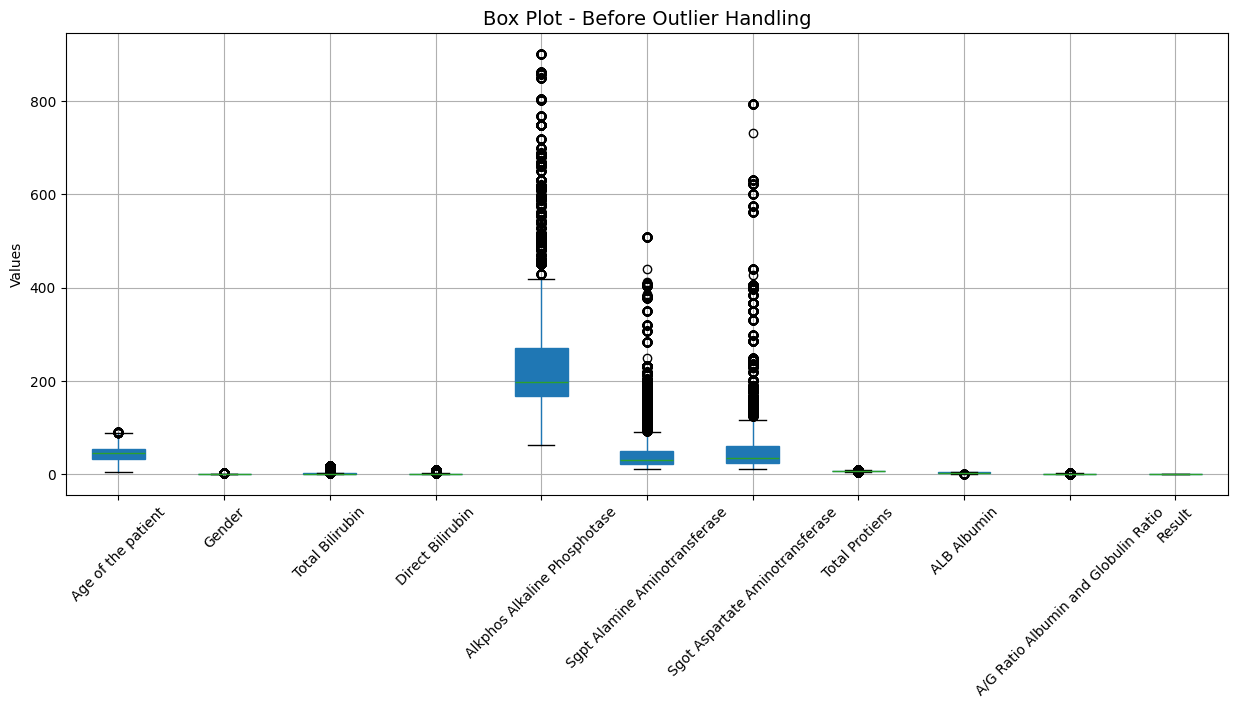


📊 **Box Plot After Removing Outliers:**


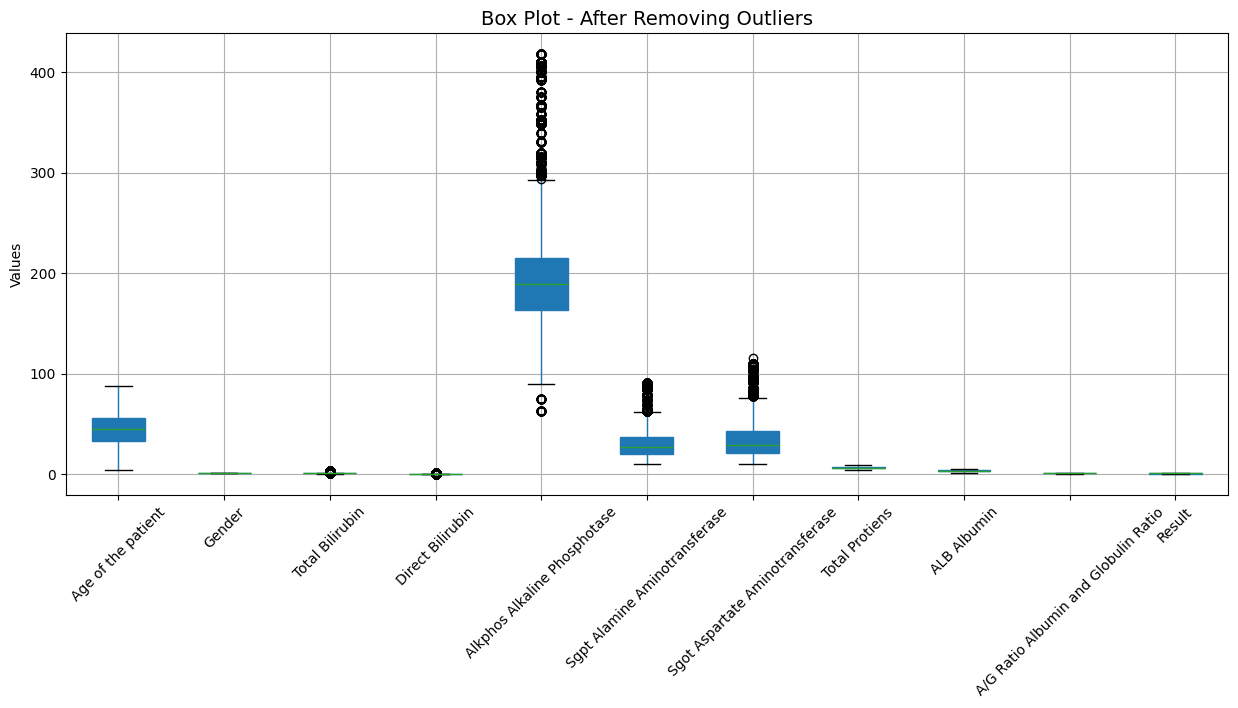


📊 **Box Plot After Winsorization:**


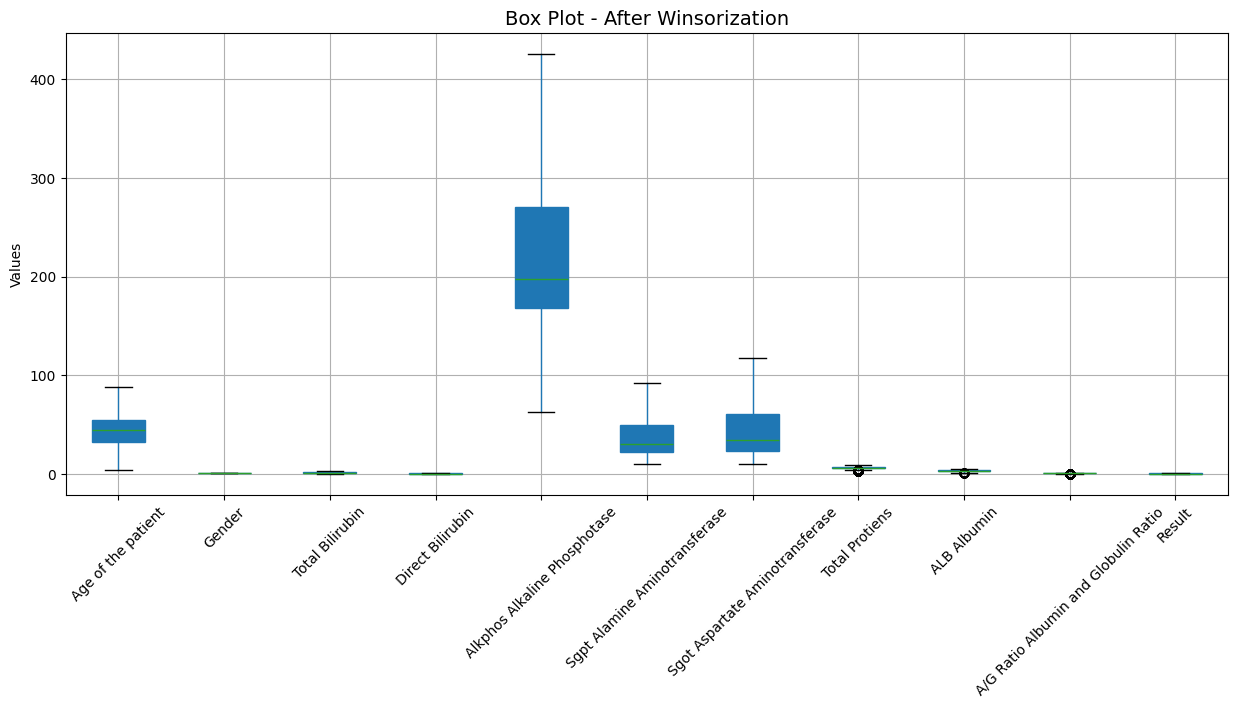


📊 **Box Plot After Log Transformation:**


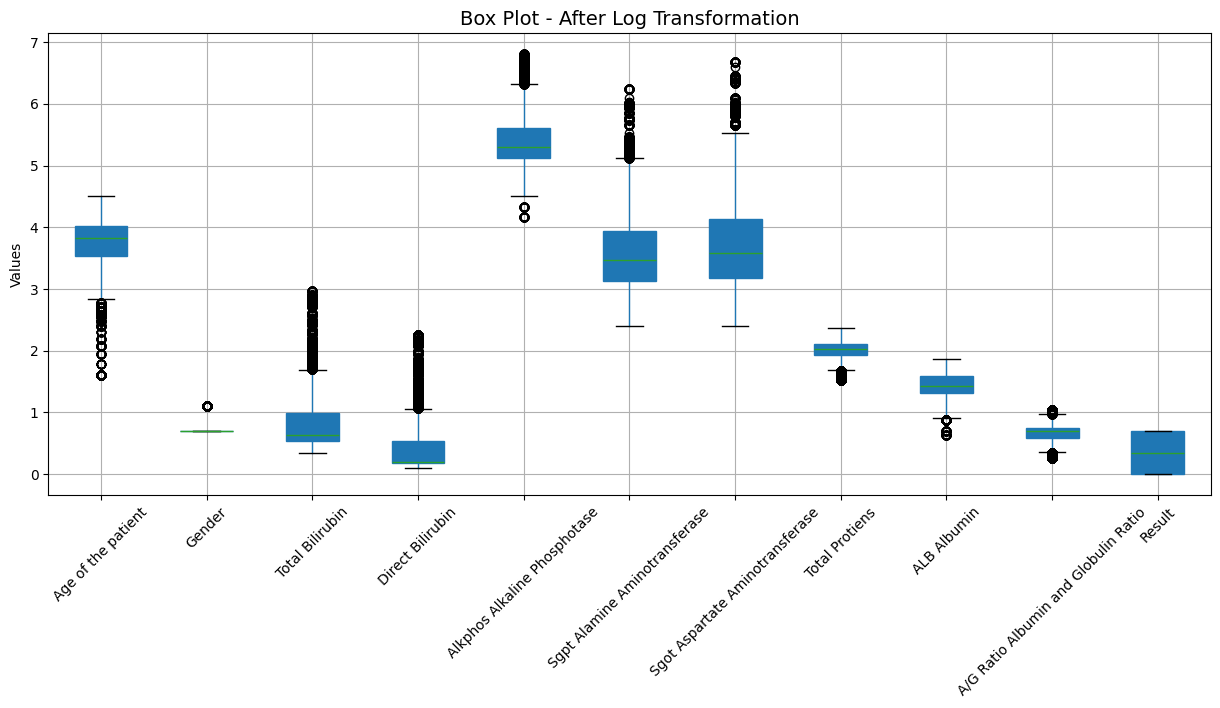


✅ **Select Outlier Handling Method:**
1️⃣ Remove Outliers (Deletes Rows)
2️⃣ Winsorization (Replaces Outliers)
3️⃣ Log Transformation (Reduces Outlier Impact)
Enter 1, 2, or 3: 3

📌 **Final Dataset: Log Transformation Applied**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Processed dataset saved and ready for download: **Processed_Dataset_Log_Transformed.csv**


In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas numpy matplotlib seaborn scipy

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import zscore

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Define Outlier Detection Methods
def detect_outliers_iqr(data):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_index.update(outliers.index)
    return list(outliers_index)

def detect_outliers_zscore(data, threshold=3):
    outliers_index = set()
    for column in data.select_dtypes(include=['number']).columns:
        z_scores = np.abs(zscore(data[column]))
        outliers = data[z_scores > threshold]
        outliers_index.update(outliers.index)
    return list(outliers_index)

# Detect Outliers using Both Methods
outliers_iqr = detect_outliers_iqr(df)
outliers_zscore = detect_outliers_zscore(df)

# Combine Unique Outlier Indices
outliers_combined = list(set(outliers_iqr + outliers_zscore))
total_rows = len(df)
outlier_percentage = (len(outliers_combined) / total_rows) * 100

print(f"\n📊 **Outlier Handling Report:**")
print(f"🔹 Total Rows: {total_rows}")
print(f"🔹 Outliers Detected: {len(outliers_combined)}")
print(f"🔹 Outlier Percentage: {outlier_percentage:.2f}%\n")

# ===================== OPTION 1: REMOVE OUTLIERS ===================== #
df_removed = df.drop(index=outliers_combined)
print(f"✅ Outliers Removed. New dataset has {len(df_removed)} rows (Reduced from {total_rows}).")

# ===================== OPTION 2: WINSORIZATION ===================== #
def winsorize_data(data):
    df_winsorized = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_winsorized[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        df_winsorized[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return df_winsorized

df_winsorized = winsorize_data(df)
print(f"✅ Winsorization Applied: Extreme values replaced with nearest valid boundary.")

# ===================== OPTION 3: LOG TRANSFORMATION ===================== #
def log_transform_data(data):
    df_log = data.copy()
    for column in data.select_dtypes(include=['number']).columns:
        df_log[column] = np.log1p(df_log[column])  # log1p avoids log(0) errors
    return df_log

df_log_transformed = log_transform_data(df)
print(f"✅ Log Transformation Applied: Outliers impact reduced without removal.")

# ===================== OPTION 4: VISUALIZE HANDLED DATA ===================== #
def plot_boxplots(data, title):
    numeric_cols = data.select_dtypes(include=['number']).columns
    plt.figure(figsize=(15, 6))
    data[numeric_cols].boxplot(rot=45, grid=True, patch_artist=True, showfliers=True)
    plt.title(title, fontsize=14)
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.show()

# Original vs Processed Data Visualization
print("\n📊 **Box Plot Before Handling Outliers:**")
plot_boxplots(df, "Box Plot - Before Outlier Handling")

print("\n📊 **Box Plot After Removing Outliers:**")
plot_boxplots(df_removed, "Box Plot - After Removing Outliers")

print("\n📊 **Box Plot After Winsorization:**")
plot_boxplots(df_winsorized, "Box Plot - After Winsorization")

print("\n📊 **Box Plot After Log Transformation:**")
plot_boxplots(df_log_transformed, "Box Plot - After Log Transformation")

# ===================== FINAL CHOICE ===================== #
print("\n✅ **Select Outlier Handling Method:**")
print("1️⃣ Remove Outliers (Deletes Rows)")
print("2️⃣ Winsorization (Replaces Outliers)")
print("3️⃣ Log Transformation (Reduces Outlier Impact)")
choice = input("Enter 1, 2, or 3: ")

if choice == "1":
    df_final = df_removed
    print("\n📌 **Final Dataset: Outliers Removed**")
    file_name = "Processed_Dataset_Removed_Outliers.csv"
elif choice == "2":
    df_final = df_winsorized
    print("\n📌 **Final Dataset: Winsorization Applied**")
    file_name = "Processed_Dataset_Winsorized.csv"
elif choice == "3":
    df_final = df_log_transformed
    print("\n📌 **Final Dataset: Log Transformation Applied**")
    file_name = "Processed_Dataset_Log_Transformed.csv"
else:
    df_final = df
    file_name = "Processed_Dataset_Original.csv"
    print("\n⚠ Invalid choice. Using original dataset.")

# ===================== SAVE & DOWNLOAD FINAL DATASET ===================== #
df_final.to_csv(file_name, index=False)
files.download(file_name)
print(f"\n✅ Processed dataset saved and ready for download: **{file_name}**")


📂 Please upload your dataset...


Saving holidays.csv to holidays (1).csv

🔍 Total Outliers Detected: 33901
📏 Percentage of Outliers in Dataset: 78.33%
📊 Outliers per Column:
 Age of the patient                        63
Gender                                  8519
Total Bilirubin                         4734
Direct Bilirubin                        5335
Alkphos Alkaline Phosphotase            3782
Sgpt Alamine Aminotransferase           4253
Sgot Aspartate Aminotransferase         4458
Total Protiens                           981
ALB Albumin                               65
A/G Ratio Albumin and Globulin Ratio    1711
Result                                     0
dtype: int64


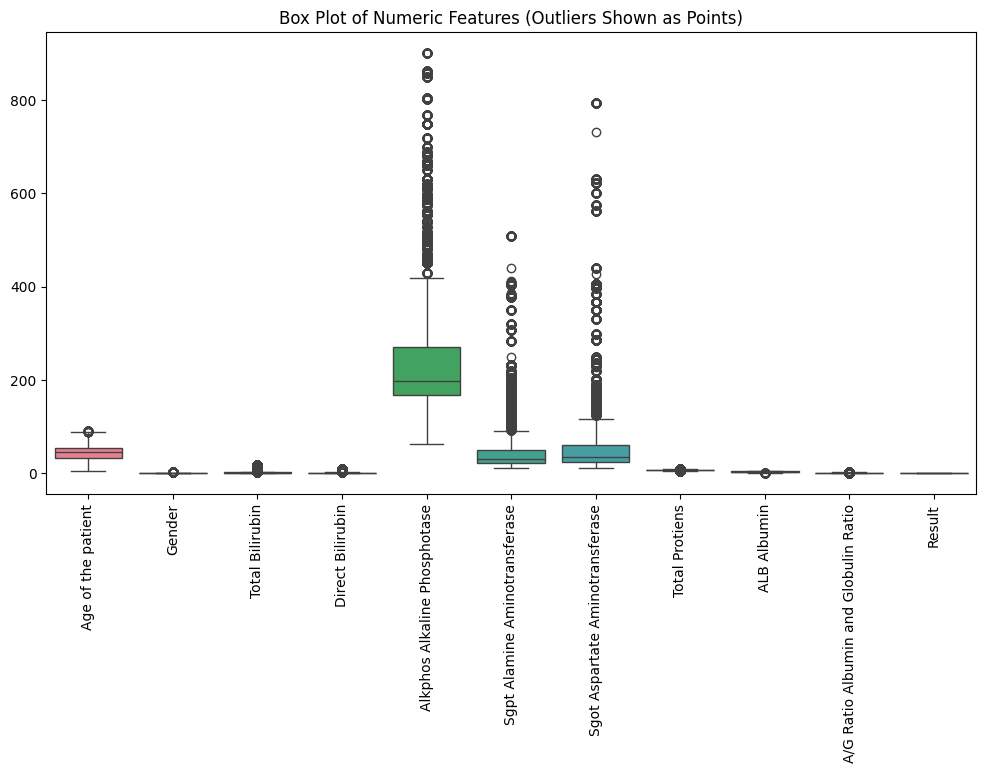


📌 Choose how to handle outliers:
1️⃣ Replace with Mean
2️⃣ Replace with Median
3️⃣ Winsorization (Limit Outlier Values)
4️⃣ Remove Outliers Completely

Enter your choice (1-4): 1
✅ Outliers replaced with Mean values.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Processed dataset saved as 'Processed_Dataset.csv'

📊 Comparing Model Performance Before & After Outlier Handling...
✅ Model Accuracy After Outlier Handling: 99.71%


In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Detect Outliers Using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound))

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Identify outliers
outlier_mask = df[numeric_cols].apply(detect_outliers_iqr)
outlier_counts = outlier_mask.sum()

# Count total outliers
total_outliers = outlier_mask.sum().sum()
total_rows = len(df)
percentage_outliers = (total_outliers / total_rows) * 100

# Display outlier stats
print(f"\n🔍 Total Outliers Detected: {total_outliers}")
print(f"📏 Percentage of Outliers in Dataset: {percentage_outliers:.2f}%")
print("📊 Outliers per Column:\n", outlier_counts)

# Step 3: Visualize Outliers Using Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Box Plot of Numeric Features (Outliers Shown as Points)")
plt.show()

# Step 4: Choose Outlier Handling Strategy
print("\n📌 Choose how to handle outliers:")
print("1️⃣ Replace with Mean")
print("2️⃣ Replace with Median")
print("3️⃣ Winsorization (Limit Outlier Values)")
print("4️⃣ Remove Outliers Completely")
choice = int(input("\nEnter your choice (1-4): "))

if choice == 1:
    df[numeric_cols] = df[numeric_cols].apply(lambda x: np.where(outlier_mask[x.name], x.mean(), x))
    print("✅ Outliers replaced with Mean values.")
elif choice == 2:
    df[numeric_cols] = df[numeric_cols].apply(lambda x: np.where(outlier_mask[x.name], x.median(), x))
    print("✅ Outliers replaced with Median values.")
elif choice == 3:
    df[numeric_cols] = df[numeric_cols].clip(lower=df[numeric_cols].quantile(0.05), upper=df[numeric_cols].quantile(0.95), axis=1)
    print("✅ Winsorization applied (Extreme values limited).")
elif choice == 4:
    df = df[~outlier_mask.any(axis=1)]
    print("✅ Outliers removed completely.")

# Step 5: Save Processed Dataset
df.to_csv("Processed_Dataset.csv", index=False)
files.download("Processed_Dataset.csv")
print("\n✅ Processed dataset saved as 'Processed_Dataset.csv'")

# Step 6: Compare Model Performance Before & After Outlier Handling
print("\n📊 Comparing Model Performance Before & After Outlier Handling...")

# Prepare Data
target_column = "Result"  # Change to actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"✅ Model Accuracy After Outlier Handling: {accuracy:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from google.colab import files

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Identify Numeric Columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Step 3: Detect Outliers Using the IQR Method
outlier_mask = pd.DataFrame(False, index=df.index, columns=df.columns)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

# Step 4: Apply KNN Imputation to Replace Outliers
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Step 5: Save Processed Dataset
df.to_csv("Processed_Dataset_KNN.csv", index=False)
files.download("Processed_Dataset_KNN.csv")
print("\n✅ Processed dataset saved as 'Processed_Dataset_KNN.csv'.")


📂 Please upload your dataset...


Saving holidays.csv to holidays (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Processed dataset saved as 'Processed_Dataset_KNN.csv'.
